In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("cleaned_legal_metadata.csv")

In [4]:
def extract_case_type(docket):
    docket = str(docket).upper()
    if 'CR' in docket:
        return 'Criminal'
    elif 'CV' in docket or 'CIVIL' in docket:
        return 'Civil'
    elif 'MDL' in docket:
        return 'MDL'
    else:
        return 'Other'

df['case_type'] = df['docket_number'].apply(extract_case_type)
print(df.head())

         id                                               name  \
0  12532561  Jessica OLSEN, on behalf of herself and all ot...   
1  12532560  AMERICAN CENTER FOR LAW AND JUSTICE, Plaintiff...   
2  12532562  UNITED STATES of America, Plaintiff, v. Steven...   
3  12532563  Kaori STEARNEY, et al., Plaintiffs, v. UNITED ...   
4  12532564  IN RE: GERMAN AUTOMOTIVE MANUFACTURERS ANTITRU...   

                                   name_abbreviation decision_date  \
0                              Olsen v. Nelnet, Inc.    2019-05-21   
1  Am. Ctr. for Law & Justice v. U.S. Dep't of Ju...    2019-06-30   
2                             United States v. Emery    2019-06-21   
3                          Stearney v. United States    2019-05-16   
4          In re German Auto. Mfrs. Antitrust Litig.    2019-06-17   

                    docket_number court/name_abbreviation case_type  
0                    4:18-CV-3081                 D. Neb.     Civil  
1  Civil Action No. 16-2188 (TJK)         

In [5]:
X_text = df['name'].astype(str)
y = df['case_type']

In [6]:
print(df[['name', 'case_type']].head())


                                                name case_type
0  Jessica OLSEN, on behalf of herself and all ot...     Civil
1  AMERICAN CENTER FOR LAW AND JUSTICE, Plaintiff...     Civil
2  UNITED STATES of America, Plaintiff, v. Steven...  Criminal
3  Kaori STEARNEY, et al., Plaintiffs, v. UNITED ...     Civil
4  IN RE: GERMAN AUTOMOTIVE MANUFACTURERS ANTITRU...  Criminal


In [7]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_text)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71, 644)
(71,)
(18, 644)
(18,)


In [74]:
model = LogisticRegression()

model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

[ 1.86005072 -0.07979186 -2.03785166  0.25759281]
[[-0.07554938 -0.07554938  0.03487241 ...  0.06946795 -0.17117024
   0.13410262]
 [-0.01842474 -0.01842474 -0.01336235 ... -0.0283754  -0.0427962
  -0.0574506 ]
 [-0.0030326  -0.0030326  -0.0022013  ... -0.00428835  0.30070517
  -0.00804303]
 [ 0.09700672  0.09700672 -0.01930877 ... -0.0368042  -0.08673874
  -0.06860899]]


In [75]:

score = model.score(X_train, y_train)
score

0.8169014084507042

In [76]:
score=model.score(X_test, y_test)
score

0.6666666666666666

In [77]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Civil       0.65      1.00      0.79        11
    Criminal       1.00      0.20      0.33         5
       Other       0.00      0.00      0.00         2

    accuracy                           0.67        18
   macro avg       0.55      0.40      0.37        18
weighted avg       0.67      0.67      0.57        18



c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [78]:
y_pred = model.predict(X_train)
print("Classification Report:")
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Civil       0.79      1.00      0.88        48
    Criminal       1.00      0.91      0.95        11
         MDL       0.00      0.00      0.00         1
       Other       0.00      0.00      0.00        11

    accuracy                           0.82        71
   macro avg       0.45      0.48      0.46        71
weighted avg       0.69      0.82      0.74        71



c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

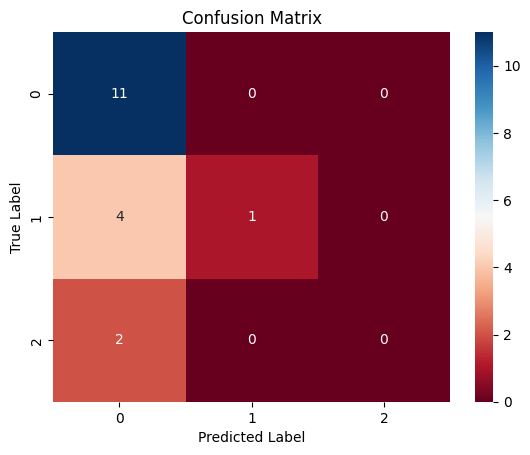

Class labels: ['Civil' 'Criminal' 'MDL' 'Other']


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)



cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Class labels:", model.classes_)



# Fine Tuning

In [80]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1
)

In [81]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [82]:
y_pred1 = grid.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

       Civil       0.69      1.00      0.81        11
    Criminal       1.00      0.40      0.57         5
       Other       0.00      0.00      0.00         2

    accuracy                           0.72        18
   macro avg       0.56      0.47      0.46        18
weighted avg       0.70      0.72      0.66        18



c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [83]:
y_pred1= grid.predict(X_train)
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

       Civil       1.00      1.00      1.00        48
    Criminal       1.00      1.00      1.00        11
         MDL       1.00      1.00      1.00         1
       Other       1.00      1.00      1.00        11

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

